In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from os.path import isdir
from os import listdir, mkdir
from matplotlib.backends.backend_pdf import PdfPages

rcParams = {'font.size': 24, 'font.weight': 'normal', 'font.family': 'sans-serif',
            'axes.unicode_minus':False, 'axes.labelweight':'normal'}

plt.rcParams.update(rcParams)

In [52]:
outdir = '/Users/harihara/Research-Activities/Plots/Hot_Spring_Plots/Single_Cell_Analyses/'
if not isdir(outdir):
    mkdir(outdir)
pdf = PdfPages(outdir+'PIdentity_100.pdf')

data_dir = 'Mount-2/hotspring_metagenome/single_cell_analysis_with_Gabe_Birzu/\
C_Allele_Relative_Abundance_Aug/Filtered_Alignments/Pident_100/'
df_A = pd.read_excel(data_dir+'A_Allele.xlsx',header=[0,1])
df_B = pd.read_excel(data_dir+'B_Allele.xlsx',header=[0,1])
df_C = pd.read_excel(data_dir+'C_Allele.xlsx',header=[0,1])
df_A = df_A.drop(0)
df_B = df_B.drop(0)
df_C = df_C.drop(0)


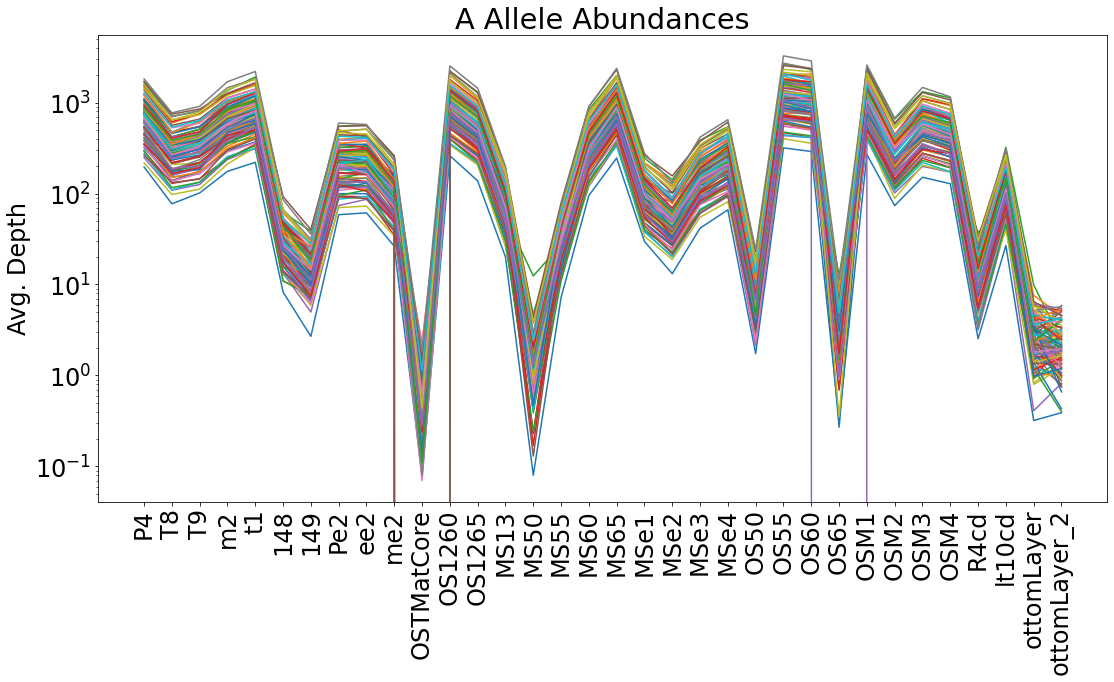

In [53]:
plt.rcParams.update(rcParams)

A_counts = df_A.iloc[:, df_A.columns.get_level_values(1)=='Num_Reads'].sum(axis = 1).tolist()
top_100 = np.argsort(A_counts)[-100:]
df_A_Filtered = df_A.iloc[top_100]
df_A_Filtered = df_A_Filtered.set_index([('Sample','Stat')])
df_A_Filtered = df_A_Filtered.iloc[:,df_A_Filtered.columns.get_level_values(1)=='Avg_Depth_Coverage']
df_A_Filtered.columns = df_A_Filtered.columns.droplevel(1)
columns = []
for c in df_A_Filtered.columns.tolist():
    c = c.replace("Hotspr20Sample","").replace("Hotspr2Sample","").replace("HotsprSample","")
    c = c.replace("HotsprSamp","").replace("HotsprSamp1t","").replace("Hotspr","")
    columns.append(c)
df_A_Filtered.columns = columns

fig,ax = plt.subplots(1,1, figsize = (16,10))
df_A_Filtered.T.plot(legend = False, ax = ax)
ax.set_xticks(range(0, len(columns)))
ax.set_xticklabels(columns, rotation = 90)
ax.set_yscale('log')
ax.set_title('A Allele Abundances')
ax.set_ylabel('Avg. Depth')
fig.tight_layout()
pdf.savefig(fig)

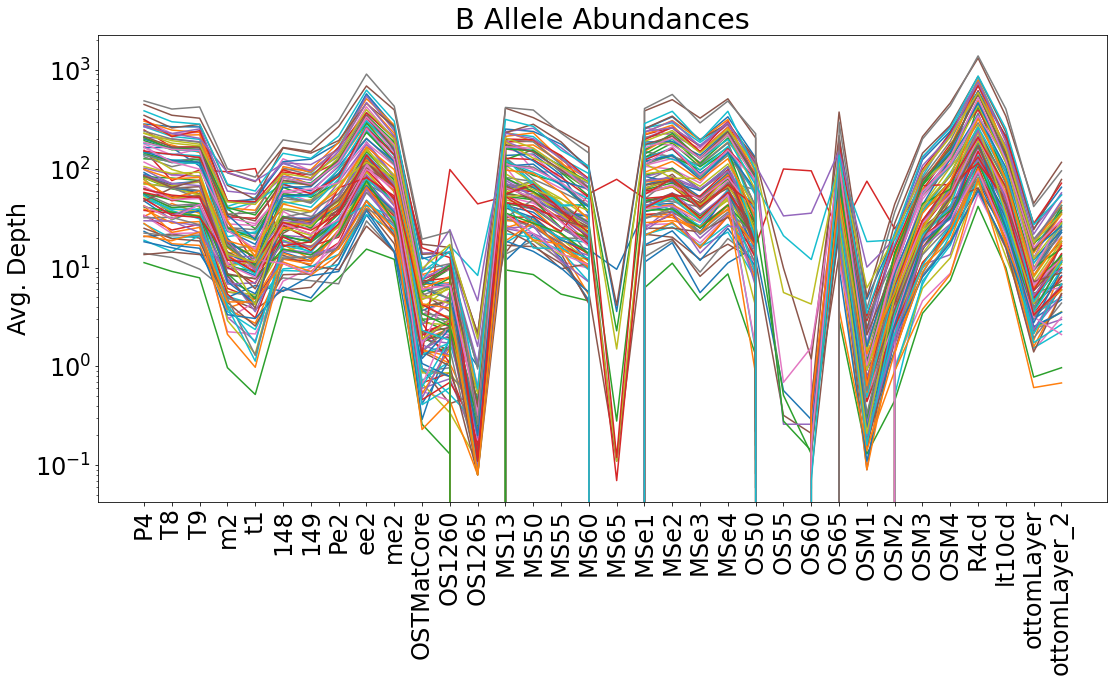

In [54]:
B_counts = df_B.iloc[:, df_B.columns.get_level_values(1)=='Num_Reads'].sum(axis = 1).tolist()
top_100 = np.argsort(B_counts)[-100:]
df_B_Filtered = df_B.iloc[top_100]
df_B_Filtered = df_B_Filtered.set_index([('Sample','Stat')])
df_B_Filtered = df_B_Filtered.iloc[:,df_B_Filtered.columns.get_level_values(1)=='Avg_Depth_Coverage']
df_B_Filtered.columns = df_B_Filtered.columns.droplevel(1)
columns = []
for c in df_B_Filtered.columns.tolist():
    c = c.replace("Hotspr20Sample","").replace("Hotspr2Sample","").replace("HotsprSample","")
    c = c.replace("HotsprSamp","").replace("HotsprSamp1t","").replace("Hotspr","")
    columns.append(c)
df_B_Filtered.columns = columns

fig,ax = plt.subplots(1,1, figsize = (16,10))
df_B_Filtered.T.plot(legend = False, ax = ax)
ax.set_xticks(range(0, len(columns)))
ax.set_xticklabels(columns, rotation = 90)
ax.set_yscale('log')
ax.set_title('B Allele Abundances')
ax.set_ylabel('Avg. Depth')
fig.tight_layout()
pdf.savefig(fig)

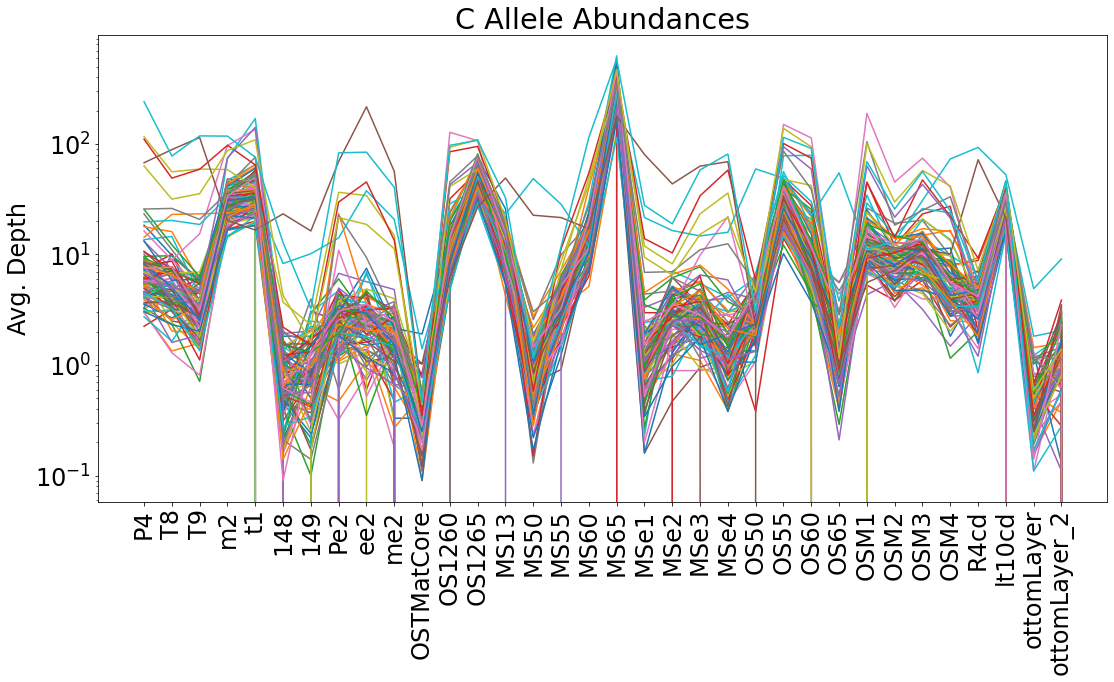

In [55]:
C_counts = df_C.iloc[:, df_C.columns.get_level_values(1)=='Num_Reads'].sum(axis = 1).tolist()
top_100 = np.argsort(C_counts)[-100:]
df_C_Filtered = df_C.iloc[top_100]
df_C_Filtered = df_C_Filtered.set_index([('Sample','Stat')])
df_C_Filtered = df_C_Filtered.iloc[:,df_C_Filtered.columns.get_level_values(1)=='Avg_Depth_Coverage']
df_C_Filtered.columns = df_C_Filtered.columns.droplevel(1)
columns = []
for c in df_C_Filtered.columns.tolist():
    c = c.replace("Hotspr20Sample","").replace("Hotspr2Sample","").replace("HotsprSample","")
    c = c.replace("HotsprSamp","").replace("HotsprSamp1t","").replace("Hotspr","")
    columns.append(c)
df_C_Filtered.columns = columns

fig,ax = plt.subplots(1,1, figsize = (16,10))
df_C_Filtered.T.plot(legend = False, ax = ax)
ax.set_xticks(range(0, len(columns)))
ax.set_xticklabels(columns, rotation = 90)
ax.set_yscale('log')
ax.set_title('C Allele Abundances')
ax.set_ylabel('Avg. Depth')
fig.tight_layout()
pdf.savefig(fig)

In [60]:
data_dir = 'Mount-2/hotspring_metagenome/single_cell_analysis_with_Gabe_Birzu/\
C_Allele_Relative_Abundance_Aug/Filtered_Alignments/'
samples = listdir(data_dir)

In [86]:
df_all_abc = pd.DataFrame()
df_both_ab = pd.DataFrame()
df_both_bc = pd.DataFrame()
df_both_ac = pd.DataFrame()

for s in samples:
    if s.startswith('Pident_'):
        df = pd.read_csv(data_dir+s+'/Counts.txt', sep = "\t", index_col = ['Sample'])
        del df['Unnamed: 0']
        
        row = df[['All_A_B_C']].T
        row['Pident'] = float(s.replace("Pident_",""))
        df_all_abc = df_all_abc.append(row)
        
        row = df[['Both_A_B']].T
        row['Pident'] = float(s.replace("Pident_",""))
        df_both_ab = df_both_ab.append(row)
        
        row = df[['Both_B_C']].T
        row['Pident'] = float(s.replace("Pident_",""))
        df_both_bc = df_both_bc.append(row)
        
        row = df[['Both_A_C']].T
        row['Pident'] = float(s.replace("Pident_",""))
        df_both_ac = df_both_ac.append(row)
df_all_abc = df_all_abc.reset_index()
del df_all_abc['index'] 
df_all_abc = df_all_abc.sort_values(by = ['Pident'])

df_both_ab = df_both_ab.reset_index()
del df_both_ab['index'] 
df_both_ab = df_both_ab.sort_values(by = ['Pident'])

df_both_bc = df_both_bc.reset_index()
del df_both_bc['index'] 
df_both_bc = df_both_bc.sort_values(by = ['Pident'])

df_both_ac = df_both_ac.reset_index()
del df_both_ac['index'] 
df_both_ac = df_both_ac.sort_values(by = ['Pident'])


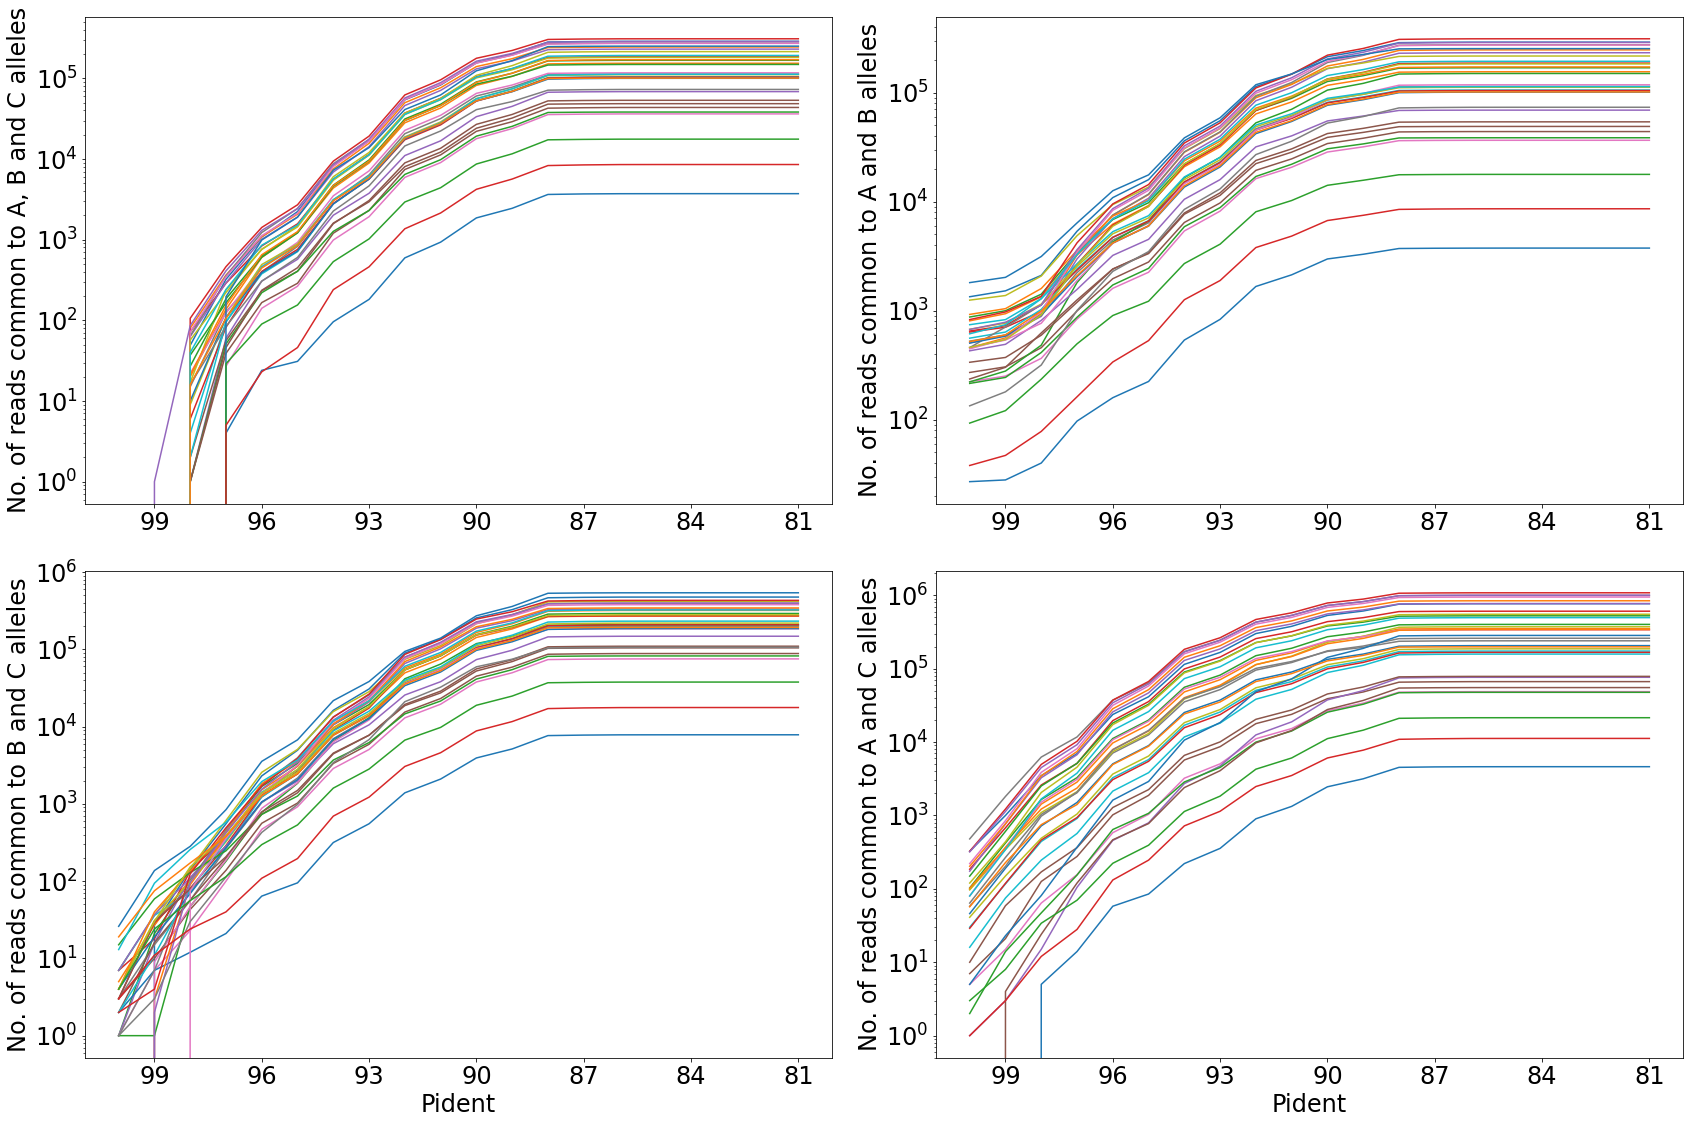

In [104]:
fig, ax = plt.subplots(2,2, figsize = (24,16))
df_all_abc.plot(x = 'Pident', legend = False, ax = ax[0][0])
ax[0][0].set_yscale('log')
ax[0][0].set_xticks(range(81, 101, 3))
ax[0][0].set_xlim(ax[0][0].get_xlim()[::-1])

df_both_ab.plot(x = 'Pident', legend = False, ax = ax[0][1])
ax[0][1].set_yscale('log')
ax[0][1].set_xticks(range(81, 101, 3))
ax[0][1].set_xlim(ax[0][1].get_xlim()[::-1])

df_both_bc.plot(x = 'Pident', legend = False, ax = ax[1][0])
ax[1][0].set_yscale('log')
ax[1][0].set_xticks(range(81, 101, 3))
ax[1][0].set_xlim(ax[1][0].get_xlim()[::-1])

df_both_ac.plot(x = 'Pident', legend = False, ax = ax[1][1])
ax[1][1].set_yscale('log')
ax[1][1].set_xticks(range(81, 101, 3))
ax[1][1].set_xlim(ax[1][1].get_xlim()[::-1])

ax[0][0].set_xlabel('')
ax[0][1].set_xlabel('')

ax[0][0].set_ylabel('No. of reads common to A, B and C alleles')
ax[0][1].set_ylabel('No. of reads common to A and B alleles')
ax[1][0].set_ylabel('No. of reads common to B and C alleles')
ax[1][1].set_ylabel('No. of reads common to A and C alleles')

fig.tight_layout()

fig.savefig(outdir+'Parameterizing_Pidentity_Cutoff.pdf')